# session 7. CNN모델링

안녕하세요, 데이크루 3기 ‘투데이💰︎' 팀입니다!

팀 투데이는 “투자에 데이터를 이용하다"의 약자입니다. 금융 데이터 수집&가공&모델링을 학습하면서 Financial Domain Knowledge와 Data Analysis Technologies 향상을 목적으로 하고 있습니다.
저희는 금융데이터와 AI기술이 만나는 전반적인 과정을 학습하고, 학습한 내용을 바탕으로 데이콘 이용자분들을 위한 콘텐츠를 제작하고 있습니다.  
**‘투데이💰︎’**의 일곱번째 포스팅의 주제는 **‘CNN 모델을 활용한 투자전략’**입니다.

아래 링크를 들어가시면 ‘투데이💰︎’의 전 커리큘럼을 보실 수 있습니다.

→ <a href="https://dacon.io/competitions/official/235946/codeshare/5502?utm_source=dacrew&utm_medium=441593&utm_campaign=dacrew_2">[투데이💰0편] 금융 데이터 분석에 앞서</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5547?utm_source=dacrew&utm_medium=441593&utm_campaign=dacrew_2">[투데이💰1편] 금융 데이터 수집</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5701?page=1&dtype=random">[투데이💰2편] 거시경제 분석</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5805?page=1&dtype=random">[투데이💰3편] 기본적 분석</a>    
→ <a href="https://dacon.io/competitions/official/235946/codeshare/5896?page=1&dtype=random">[투데이💰4편] 기술적 분석</a>    
→ <a href="https://dacon.io/competitions/official/235946/codeshare/6001?page=1&dtype=random">[투데이💰5편] ML(K-NN, Clustering)을 활용한 투자 전략</a>  
→ <a href="https://dacon.io/competitions/official/235946/codeshare/6019?page=1&dtype=random">[투데이💰6편] LSTM 모델을 활용한 투자 전략</a> 


본 포스팅은 데이콘 서포터즈 “데이크루" 3기 활동의 일환입니다.

## **목차**
#### 1. CNN 신경망 이해
#### 2. CNN 실습 (이미지 분석)
#### 3. CNN 모델링 (캔들차트, 기술지표 Feature 구성 후 학습)
#### 4. 예측 및 결과

# 1. CNN 신경망 이해

## CNN이란?
- CNN(Convolutional Neural Network)이란 합성곱 연산을 이용한 인공신경망인데요, 합성곱은 서로 반전 이동된 두 함수를 곱하여 적분해 새로운 함수를 구하는 연산자를 의미합니다.<br>
- 이미지 인식과 음성 인식 등 다양한 곳에서 사용됩니다. 이미지를 행렬로 표현하여 특징을 잘 추출하고 효과적으로 학습시키기 때문에 특히, 이미지 인식 분야의 딥러닝 기법은 CNN을 많이 활용합니다.<br>
보다 효과적인 이해를 위해 아래 간단한 CNN 모델링 구조를 확인해봅니다!<br>

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

# 입력이미지의 크기가 150 x 150인 이미지를 넣을 수 있도록 input_shape를 지정해주었습니다.
# Conv2D 와 MaxPooling2D 층은 [높이 x 넓이 x 채널]로 3차원의 텐서입니다.
# 첫 매개변수로 채널 수를 조정합니다.
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# 앞에서 나온 3D 벡터를 1D 벡터로 처리해주는 Dense 층입니다.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# 분류할 클래스를 5개로 지정하였고, 다중 분류를 위해 마지막 층의 활성화 함수로 softmax를 사용합니다.
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 165888)            0         
                                                                 
 dense (Dense)               (None, 64)                10616896  
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                        

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


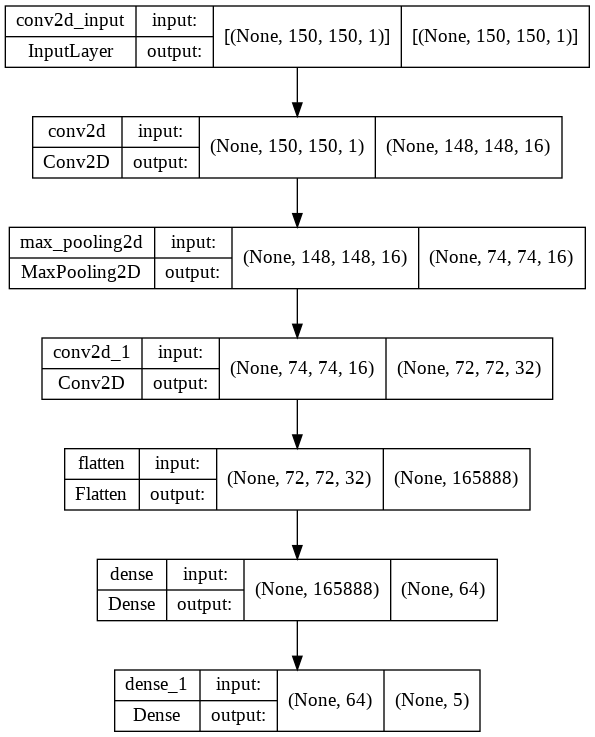

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, "경로 지정", show_shapes=True)

# 2. CNN 실습 (이미지 분석)

MNIST 데이터 셋은 케라스에 포함되어 있는 0~9까지의 숫자 데이터 셋입니다.<br>
각 이미지 별로 레이블이 매칭되어 있고 간단하게 가져와 사용할 수 있어 매우 편리하게 공부해볼 수 있습니다.<br>
해당 데이터를 활용하여 간단한 CNN실습을 진행해보겠습니다.<br>

### 2-1 데이터 가져오기

11501568/11490434 [==============================] - 0s 0us/step
4


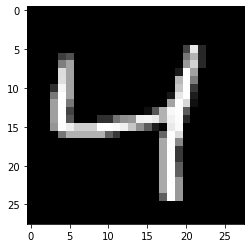

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_img, train_labels), (test_images, test_labels) = mnist.load_data()

pixels = train_img[2].reshape(28,28)      # 200 번째 이미지 확인
plt.imshow(pixels, cmap='gray')     # 흑백컬러로 출력
print(train_labels[2])

In [ ]:
# train 데이터셋 : 28x28 이미지 60000장
train_img = train_img.reshape((60000, 28, 28, 1))
train_img = train_img.astype('float32') / 255

# test 데이터셋 : 28x28 이미지 10000장
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# 각 클래스별로 분류된 데이터이므로 카테고리 형태로 지정
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 2-2 모델링

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
# 입력이미지를 28 x 28 크기로 넣을 수 있도록 input_shape를 지정
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# 다중분류를 하기 위해 마지막 활성화 함수로 softmax를 사용
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

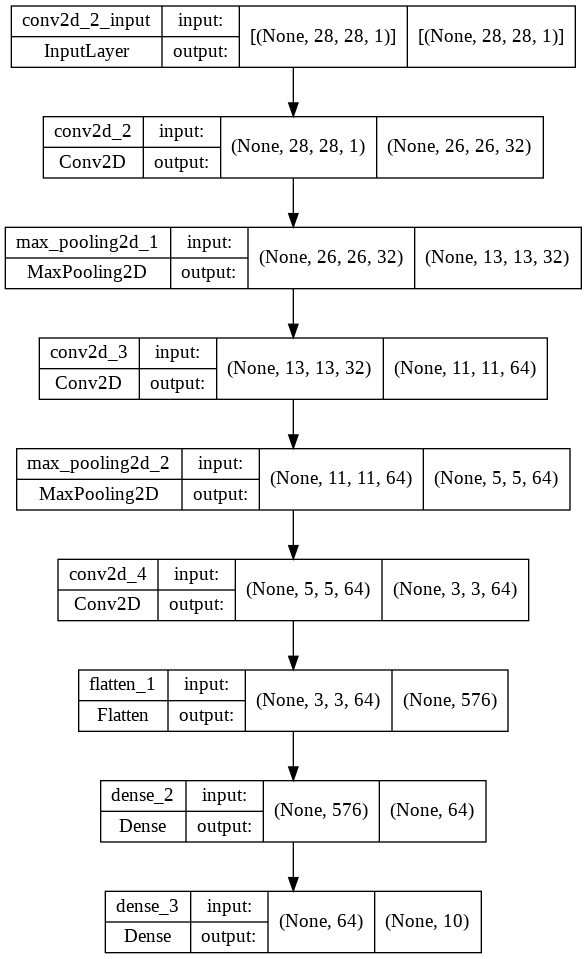

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, "경로 지정", show_shapes=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 58s 61ms/step - loss: 0.1754 - accuracy: 0.9444
Epoch 2/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0477 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0330 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0199 - accuracy: 0.9938


## 2-3 예측

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# 0.99의 정확도 달성

313/313 [==============================] - 3s 10ms/step - loss: 0.0263 - accuracy: 0.9906


**결과 해석** <br>
위 모델 구조로 학습하였을때 test 셋으로 검증해본 결과 0.99의 정확도를 달성하였습니다.<br>
이처럼 합성곱 신경망을 이용하면 간단한 구조를 이용하여 이미지를 효율적으로 처리해주는 것을 알 수 있습니다. 

# 3. CNN 모델링 (캔들차트, 기술지표 Feature 구성 후 학습)

주식 데이터는 시간 경과에 따른 데이터로 시계열 데이터를 처리하는 모델을 활용한 경우가 많습니다. 따라서 이전 연구에는 RNN과 LSTM을 이용하여 주가를 예측하고, 뉴스 데이터와 SNS 데이터를 활용하여 주식 시장을 예측하려는 경우가 많았습니다. <br> <a href="https://dacon.io/competitions/official/235946/codeshare/5701?page=1&dtype=random">[투데이💰2편] 거시경제 분석</a>에서 뉴스데이터를 이용한 주가 예측 콘텐츠를 확인해볼 수 있습니다.<br>

이번 콘텐츠에서는 주식 데이터에서는 자주 쓰이진 않지만 시도해보기 좋은 캔들스틱 차트를 이용하여 주가 상승과 하락을 예측해보았습니다. <br>

주가를 캔들스틱 차트로 시각화하여 CNN구조, 여러가지 기술지표로 LSTM 구조를 이용하여 예측해봅시다!

In [ ]:
!pip install mpl_finance
!pip install pykrx

from tqdm import tqdm
from time import time
import numpy as np
import pandas as pd
from mpl_finance import candlestick2_ochl
from pykrx import stock 
import matplotlib.pyplot as plt 
import cv2
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 2.5 MB/s 
     |████████████████████████████████| 52 kB 727 kB/s 
     |████████████████████████████████| 251 kB 25.6 MB/s 


### 3-1 데이터 생성

In [ ]:
# 삼성전자 데이터 가져오기
st = stock.get_market_ohlcv('20101029', '20211231', "005930")

In [ ]:
df = st.copy()
print(df.shape)
df.head()

(2756, 5)


,시가,고가,저가,종가,거래량
날짜,,,,,
2010-10-29,15280,15300,14900,14900,463204
2010-11-01,15060,15060,14860,14940,296972
2010-11-02,14939,14960,14740,14800,330999
2010-11-03,14799,14980,14779,14800,359315
2010-11-04,14940,15280,14900,15260,547715


LSTM 모델에서 기술지표로 활용할 Feature를 구성해줍니다.
<a href="https://dacon.io/competitions/official/235946/codeshare/6019?page=1&dtype=random">[투데이💰6편] LSTM 모델을 활용한 투자 전략</a> 에서 자세한 설명을 확인할 수 있습니다.
- RSI : 가격의 상승압력과 하락압력 간의 상대적인 강도
- 종가응용지표


In [ ]:
# RSI 지표

# 가격이 전일 가격보다 상승한 날의 상승분의 평균
U = np.where(df['종가'].diff(1) > 0, df['종가'].diff(1), 0) 
AU = pd.DataFrame(U, index=df.index).rolling(window=14, min_periods=1).mean() 
# 가격이 전일 가격보다 하락한 날의 하락분의 평균
D = np.where(df['종가'].diff(1) < 0, df['종가'].diff(1) *(-1), 0) 
AD = pd.DataFrame(D, index=df.index).rolling(window=14, min_periods=1).mean() 

RSI = AU / (AD+AU) *100 
df['RSI'] = RSI
df['RSI_signal'] = df["RSI"].rolling(6, min_periods=1).mean()

# 종가응용지표
aa = abs(df['종가']-df['종가'].shift(1))
bb = aa/df['종가']*100
df['CLOSE_PRIVATE'] = bb
df = df[1:]
del df['RSI_signal']
df

,시가,고가,저가,종가,거래량,RSI,CLOSE_PRIVATE
날짜,,,,,,,
2010-11-01,15060,15060,14860,14940,296972,100.000000,0.267738
2010-11-02,14939,14960,14740,14800,330999,22.222222,0.945946
2010-11-03,14799,14980,14779,14800,359315,22.222222,0.000000
2010-11-04,14940,15280,14900,15260,547715,78.125000,3.014417
2010-11-05,15600,15800,15500,15520,703745,84.444444,1.675258
...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,73.863636,0.745342
2021-12-27,80600,80600,79800,80200,10783368,67.500000,0.374065
2021-12-28,80200,80400,79700,80300,18226325,67.901235,0.124533


### 3-2 학습할 이미지 생성

CNN 구조를 학습시킬 이미지와 레이블을 생성합니다.<br>
- 레이블
    - 전날 종가가 다음날 종가보다 높으면 0 <br>
    - 전날 종가가 다음날 종가보다 낮거나 같으면 1<br>
- 이미지 <br>
    20일차의 캔들차트를 100x100 크기의 이미지로 생성하여 저장합니다. <br>

캔들차트에 대한 자세한 설명은 <a href="https://dacon.io/competitions/official/235946/codeshare/5896?page=1&dtype=random">[투데이💰4편] 기술적 분석</a> 콘텐츠의 2번째 목차 '차트에 대하여/캔들 차트 시각화'에서 확인하실 수 있습니다!

In [ ]:
# 레이블 생성
for idx, val in enumerate(df.index[:-1]):
  a = df.iloc[idx,3]
  b = df.iloc[idx+1,3]

  if a > b :
      label = 0
  else :
      label = 1

  df.loc[val,'label'] = label
  
df.head(5)

,시가,고가,저가,종가,거래량,RSI,CLOSE_PRIVATE,label
날짜,,,,,,,,
2010-11-01,15060,15060,14860,14940,296972,100.000000,0.267738,0.0
2010-11-02,14939,14960,14740,14800,330999,22.222222,0.945946,1.0
2010-11-03,14799,14980,14779,14800,359315,22.222222,0.000000,1.0
2010-11-04,14940,15280,14900,15260,547715,78.125000,3.014417,1.0
2010-11-05,15600,15800,15500,15520,703745,84.444444,1.675258,1.0


In [ ]:
# 이미지를 학습할 figure 와 label 생성 후 저장
start = time()
img_labels = []
img_name = []

sz = 2700

for i in tqdm(range(0,sz)):
  end1 = df.iloc[i:i + 20 - 1, :]
  end2 = df.iloc[i:i + 20, :]

  starting = end2["종가"].iloc[-2]
  endvalue = end2["종가"].iloc[-1]

  img_labels.append(end1.iloc[-1]['label'])
  img_name.append(end1.index[-1])

  fig = plt.figure(figsize=(5,5))  # dpi=96
  ax1 = fig.add_subplot(1, 1, 1)
  candlestick2_ochl(ax1, end1['시가'], end1['종가'], end1['고가'], end1['저가'], width=0.7,
                                colorup='r', colordown='b')
  ax1.grid(False)
  ax1.set_xticklabels([])
  ax1.set_yticklabels([])
  ax1.xaxis.set_visible(False)
  ax1.yaxis.set_visible(False)
  ax1.axis('off')
  plt.tight_layout()
  plt.draw()

  # 100 x 100
  fig.set_size_inches(1.4, 1.4)
  fig = plt.gcf()

  plt.savefig(f'경로 지정/test_{i}.png', dpi=fig.dpi)
  plt.close()

print(f'\n 걸린 시간 {time()-start} 초')

100%|██████████| 2700/2700 [19:11<00:00,  2.35it/s]


 걸린 시간 1151.2414798736572 초


모델에 넣어 학습시키기 위한 형태로 변경해주는 함수를 작성해줍니다.

In [ ]:
def load_data_CNN(img, img_labels, train_len=2000, train=False):
  if train==True:
    figs = img[:train_len]
    figs = figs.astype('float32')

    labels = img_labels[:train_len]
    labels = np.asarray(labels).astype('float32')
  else:
    figs = img[train_len:]
    figs = figs.astype('float32')

    labels = img_labels[train_len:]
    labels = np.asarray(labels).astype('float32')

  return figs, labels

In [ ]:
def load_data_LSTM(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

### 3-3 CNN 모델링 및 학습

In [ ]:
# 저장한 피쳐들 가져오기
sz = 2700
figs = np.zeros((sz, 100, 100, 3)) 

start = time()
for i in tqdm(range(0,sz)):  
  img = cv2.imread(f'경로 지정/test_{i}.png')

  figs[i] = img[:,:,:3]

print(f'\n 걸린 시간 {time()-start} 초')  

100%|██████████| 2700/2700 [00:06<00:00, 394.23it/s]


 걸린 시간 6.861656904220581 초


In [ ]:
train_figs, train_labels = load_data_CNN(figs, img_labels, train=True)
test_figs, test_labels = load_data_CNN(figs, img_labels, train=False)

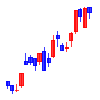

2010-11-25 00:00:00


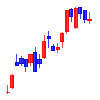

2010-11-29 00:00:00


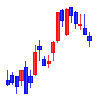

2010-12-01 00:00:00


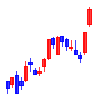

2010-12-03 00:00:00


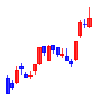

2010-12-07 00:00:00


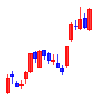

2010-12-09 00:00:00


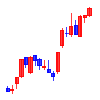

2010-12-13 00:00:00


In [ ]:
# 캔들스틱차트 확인
for i in range(0,14,2):
  cv2_imshow(train_figs[i])
  print(img_name[i])

In [ ]:
print(np.shape(train_figs), np.shape(train_labels))
print(np.shape(test_figs), np.shape(test_labels))

(2000, 100, 100, 3) (2000,)
(700, 100, 100, 3) (700,)


In [ ]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(100, 100, 3)))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

model1.add(layers.Conv2D(48, (3,3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3,3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

model1.add(layers.Conv2D(96, (3,3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(128, (3,3), padding="same", activation="relu"))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1,activation="sigmoid"))

In [ ]:
model1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 48)        13872     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 48)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 48)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)       

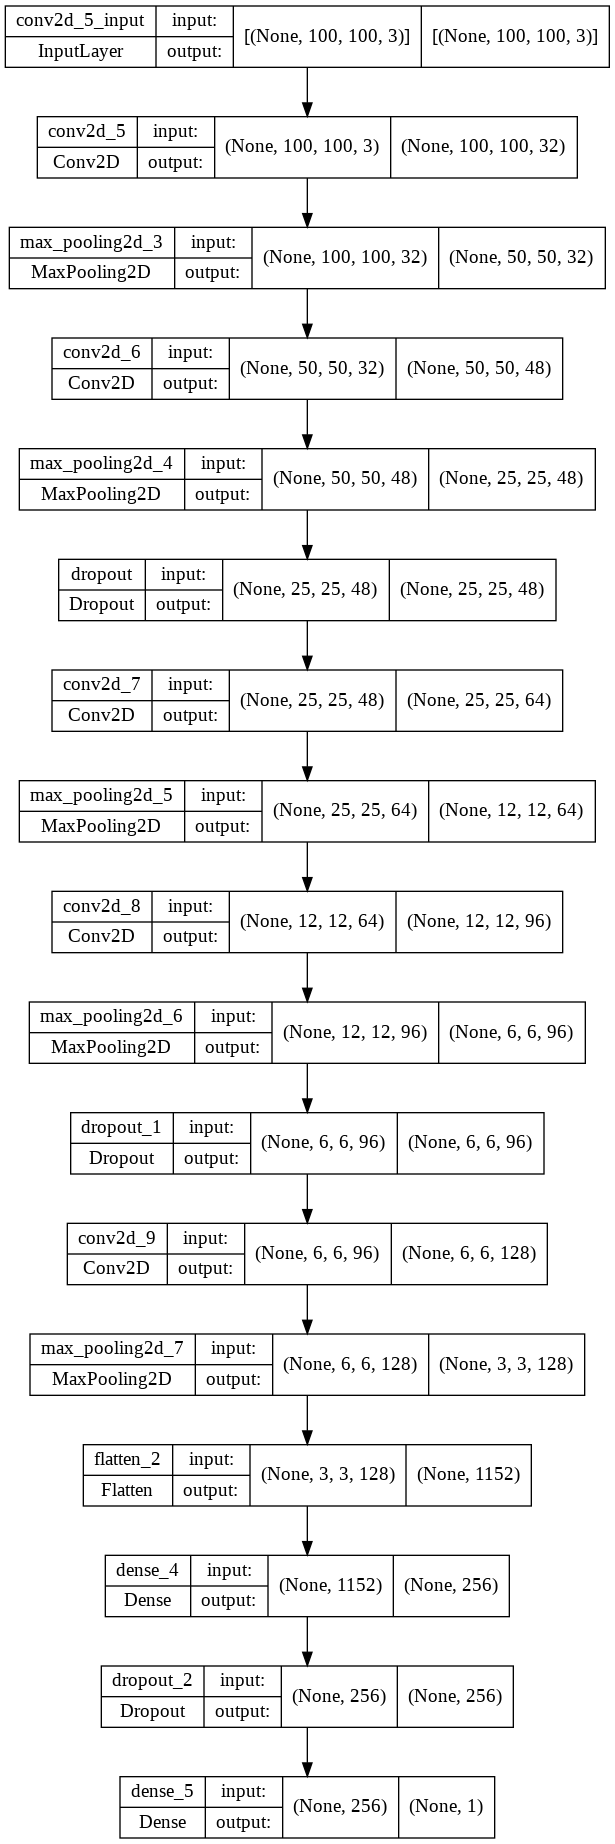

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, "경로 지정", show_shapes=True)

In [ ]:
model1.fit(train_figs, train_labels, epochs=50, batch_size=16)

Epoch 1/50
125/125 [==============================] - 38s 288ms/step - loss: 9.5693 - accuracy: 0.4990
Epoch 2/50
125/125 [==============================] - 36s 287ms/step - loss: 0.7649 - accuracy: 0.4935
Epoch 3/50
125/125 [==============================] - 36s 291ms/step - loss: 0.7052 - accuracy: 0.5140
Epoch 4/50
125/125 [==============================] - 37s 298ms/step - loss: 0.7085 - accuracy: 0.5270
Epoch 5/50
125/125 [==============================] - 49s 389ms/step - loss: 0.6984 - accuracy: 0.5295
Epoch 6/50
125/125 [==============================] - 36s 288ms/step - loss: 0.6961 - accuracy: 0.5340
Epoch 7/50
125/125 [==============================] - 36s 291ms/step - loss: 0.7094 - accuracy: 0.5360
Epoch 8/50
125/125 [==============================] - 37s 294ms/step - loss: 0.6908 - accuracy: 0.5330
Epoch 9/50
125/125 [==============================] - 36s 288ms/step - loss: 0.6952 - accuracy: 0.5295
Epoch 10/50
125/125 [==============================] - 36s 291ms/step - l

In [ ]:
pred_cnn = model1(test_figs).numpy()
pred_cnn

array([[0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.53126484],
       [0.531

### 3-4 LSTM 모델링 및 학습

LSTM 파트는 <a href="https://dacon.io/competitions/official/235946/codeshare/6019?page=1&dtype=random">[투데이💰6편] LSTM 모델을 활용한 투자 전략</a>과 동일한 방식을 활용했습니다.

In [ ]:
df = df[:2700]
df.shape

(2700, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_lstm = df[['시가',	'고가',	'저가',	'거래량',	'RSI', 'CLOSE_PRIVATE','label']]

df_lstm = scaler.fit_transform(df_lstm[df_lstm.columns])
df_lstm = pd.DataFrame(df_lstm, columns = ['시가',	'고가',	'저가',	'거래량',	'RSI', 'CLOSE_PRIVATE','label'])

df_lstm['날짜'] = df.index
df_lstm.head()

,시가,고가,저가,거래량,RSI,CLOSE_PRIVATE,label,날짜
0,0.166777,0.155579,0.166034,0.003289,1.000000,0.028248,0.0,2010-11-01
1,0.165437,0.154545,0.164693,0.003665,0.141026,0.099803,1.0,2010-11-02
2,0.163887,0.154752,0.165128,0.003979,0.141026,0.000000,1.0,2010-11-03
3,0.165449,0.157851,0.166480,0.006065,0.758413,0.318038,1.0,2010-11-04
4,0.172757,0.163223,0.173184,0.007793,0.828205,0.176749,1.0,2010-11-05


In [ ]:
train_len = 1990
window_size = 10
train = df_lstm[:train_len].iloc[:,:7]
test = df_lstm[train_len:].iloc[:,:7]

In [ ]:
feature_cols = ['시가', '고가', '저가', '거래량', 'RSI', 'CLOSE_PRIVATE']
label_cols = ['label']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = load_data_LSTM(train_feature, train_label, 10)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

print(x_train.shape, x_valid.shape)

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = load_data_LSTM(test_feature, test_label, 10)
test_feature.shape, test_label.shape

(1584, 10, 6) (396, 10, 6)


((700, 10, 6), (700, 1))

In [ ]:
train_feature.shape

(1980, 10, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model2 = Sequential()
model2.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model2.add(Dense(128, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='relu'))

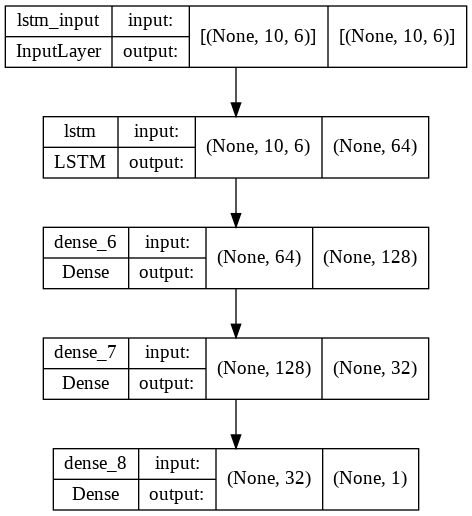

In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model2, "lstm.png", show_shapes=True)

In [ ]:
import os

model2.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model2_path = 'model2'
filename = os.path.join(model2_path, '경로 지정')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model2.fit(x_train, y_train, epochs=100, batch_size=16,
                    validation_data=(x_valid, y_valid), callbacks=[early_stop, checkpoint])

Epoch 1/100
97/99 [============================>.] - ETA: 0s - loss: 0.2781
Epoch 1: val_loss improved from inf to 0.25577, saving model to /content/drive/MyDrive/데이크루/data/tmp_checkpoint2.h5
99/99 [==============================] - 4s 26ms/step - loss: 0.2773 - val_loss: 0.2558
Epoch 2/100
99/99 [==============================] - ETA: 0s - loss: 0.2543
Epoch 2: val_loss improved from 0.25577 to 0.25232, saving model to /content/drive/MyDrive/데이크루/data/tmp_checkpoint2.h5
99/99 [==============================] - 1s 8ms/step - loss: 0.2543 - val_loss: 0.2523
Epoch 3/100
95/99 [===========================>..] - ETA: 0s - loss: 0.2532
Epoch 3: val_loss did not improve from 0.25232
99/99 [==============================] - 1s 7ms/step - loss: 0.2532 - val_loss: 0.2594
Epoch 4/100
95/99 [===========================>..] - ETA: 0s - loss: 0.2508
Epoch 4: val_loss improved from 0.25232 to 0.25070, saving model to /content/drive/MyDrive/데이크루/data/tmp_checkpoint2.h5
99/99 [============

In [ ]:
model2.load_weights(filename)
pred = model2.predict(test_feature)

pred.shape

(700, 1)

# 4. 예측 및 결과

LSTM과 CNN 모델을 활용해 예측한 결과에 0.5씩 가중치를 두어 최종결과를 예측하였습니다.

In [ ]:
pred_cnn = model1(test_figs).numpy()
pred_lstm = model2(test_feature).numpy()

In [ ]:
pred_df = pd.DataFrame()
pred_df['cnn'] = pd.DataFrame(pred_cnn)
pred_df['lstm'] = pd.DataFrame(pred_lstm)
pred_df['predict'] = pred_df['cnn']*0.5 + pred_df['lstm']*0.5
pred_df.head()

,cnn,lstm,predict
0,0.531265,0.507773,0.519519
1,0.531265,0.505920,0.518592
2,0.531265,0.504092,0.517679
3,0.531265,0.490852,0.511059
4,0.531265,0.492411,0.511838


[상승예상]


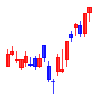

0.51153326
-------------------------------
[상승예상]


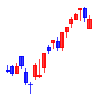

0.5092213
-------------------------------


In [ ]:
# 특정 예측치 확인
n = [5,10]
for i in n:
  if pred_df.loc[i,'predict'] > 0.5:
    print(f'[상승예상]')
  else:
    print('[하락예상]')
  cv2_imshow(test_figs[i])
  print(pred_df.loc[i,'predict'])
  print('-------------------------------')

**CNN ,LSTM 모델링 결과**<br>
캔들차트와 기술지표를 이용하여 다음날 주가의 상승과 하락을 예측한 결과를 나타냅니다.<br>
0.5 를 기준으로 작으면 하락, 크면 상승을 의미합니다.<br>

이번 콘텐츠에서 캔들차트 예측에 좋은 성능을 보이지 못한 것이 매우 아쉬웠지만 추후에 주가 이미지 처리로 좋은 성능을 낼 수 있는 아이디어를 갖고 계시다면 활발하게 댓글로 의견을 나누어봐도 좋을 것 같습니다.

다음주는 지금까지 '투데이'의 콘텐츠를 한 번에 볼 수 있도록 정리하는 글로 찾아뵙겠습니다. 감사합니다!